In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_hdf('aa_one_hot_highlow.h5')

In [3]:
data.head()

,class,prest_id,conc_cf,aa_one_hot
1,0,140099,2.91540,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
2,0,140225,1.48770,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,0,140325,1.50290,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,0,140354,0.92003,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10,0,140500,2.21830,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."


In [4]:
data.tail()

,class,prest_id,conc_cf,aa_one_hot
45201,1,4550047,12.28,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
45202,1,4550053,11.18,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
45203,1,4550054,10.94,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
45204,1,4560007,11.30,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
45205,1,4560013,9.38,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [5]:
data['aa_one_hot'][1].shape

(149, 20)

In [6]:
# create a 3D array of one one hot encodings
max_len = 149
width = 20
num_samples = data.shape[0]

X = np.zeros((num_samples, max_len, width))
for idx, aa_one_hot in enumerate(data['aa_one_hot'].values):
    X[idx, :, :] = aa_one_hot

    
y = data['class'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [8]:
def make_model(x_train, y_train, x_test, y_test, filt_width=3, epochs=1):

    # simple model per Yoon Kim (2014)
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from keras.layers import Conv1D, GlobalMaxPooling1D, AveragePooling1D
    model = Sequential()
    model.add(Conv1D(20, filt_width, activation='relu', input_shape=(149, 20)))
    #model.add(AveragePooling1D(pool_size=2, strides=None, padding='valid'))
    #model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=50, epochs=epochs,
              validation_data=(x_test, y_test), verbose=2)
    model.save('model_no_pool'+ str(filt_width) + '.h5')
    print('model saved as: ', 'model_no_pool'+ str(filt_width) + '.h5')
    return

In [9]:
epochs = 25

In [10]:
make_model(x_train, y_train, x_test, y_test, filt_width=3, epochs=epochs)

Using TensorFlow backend.


Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 10s - loss: 0.6975 - acc: 0.5402 - val_loss: 0.6713 - val_acc: 0.5896
Epoch 2/25
 - 9s - loss: 0.6581 - acc: 0.6114 - val_loss: 0.6542 - val_acc: 0.6096
Epoch 3/25
 - 9s - loss: 0.6405 - acc: 0.6367 - val_loss: 0.6507 - val_acc: 0.6179
Epoch 4/25
 - 9s - loss: 0.6315 - acc: 0.6463 - val_loss: 0.6519 - val_acc: 0.6123
Epoch 5/25
 - 9s - loss: 0.6259 - acc: 0.6471 - val_loss: 0.6514 - val_acc: 0.6197
Epoch 6/25
 - 9s - loss: 0.6217 - acc: 0.6494 - val_loss: 0.6528 - val_acc: 0.6188
Epoch 7/25
 - 9s - loss: 0.6164 - acc: 0.6584 - val_loss: 0.6557 - val_acc: 0.6116
Epoch 8/25
 - 9s - loss: 0.6132 - acc: 0.6599 - val_loss: 0.6539 - val_acc: 0.6141
Epoch 9/25
 - 9s - loss: 0.6101 - acc: 0.6632 - val_loss: 0.6551 - val_acc: 0.6155
Epoch 10/25
 - 9s - loss: 0.6074 - acc: 0.6706 - val_loss: 0.6561 - val_acc: 0.6150
Epoch 11/25
 - 9s - loss: 0.6053 - acc: 0.6720 - val_loss: 0.6556 - val_acc: 0.6179
Epoch 12/25
 - 9s - loss: 0.6033 - 

In [11]:
make_model(x_train, y_train, x_test, y_test, filt_width=4, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 10s - loss: 0.6950 - acc: 0.5449 - val_loss: 0.6654 - val_acc: 0.5973
Epoch 2/25
 - 10s - loss: 0.6541 - acc: 0.6181 - val_loss: 0.6530 - val_acc: 0.6099
Epoch 3/25
 - 10s - loss: 0.6385 - acc: 0.6350 - val_loss: 0.6534 - val_acc: 0.6158
Epoch 4/25
 - 10s - loss: 0.6271 - acc: 0.6461 - val_loss: 0.6515 - val_acc: 0.6183
Epoch 5/25
 - 10s - loss: 0.6239 - acc: 0.6545 - val_loss: 0.6518 - val_acc: 0.6172
Epoch 6/25
 - 10s - loss: 0.6152 - acc: 0.6557 - val_loss: 0.6532 - val_acc: 0.6189
Epoch 7/25
 - 10s - loss: 0.6110 - acc: 0.6638 - val_loss: 0.6528 - val_acc: 0.6157
Epoch 8/25
 - 10s - loss: 0.6040 - acc: 0.6668 - val_loss: 0.6598 - val_acc: 0.6145
Epoch 9/25
 - 10s - loss: 0.6006 - acc: 0.6713 - val_loss: 0.6587 - val_acc: 0.6188
Epoch 10/25
 - 10s - loss: 0.5997 - acc: 0.6697 - val_loss: 0.6556 - val_acc: 0.6161
Epoch 11/25
 - 10s - loss: 0.5943 - acc: 0.6773 - val_loss: 0.6531 - val_acc: 0.6189
Epoch 12/25
 - 10s - loss

In [12]:
make_model(x_train, y_train, x_test, y_test, filt_width=5, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 11s - loss: 0.6930 - acc: 0.5422 - val_loss: 0.6650 - val_acc: 0.6017
Epoch 2/25
 - 10s - loss: 0.6526 - acc: 0.6214 - val_loss: 0.6487 - val_acc: 0.6238
Epoch 3/25
 - 10s - loss: 0.6346 - acc: 0.6374 - val_loss: 0.6465 - val_acc: 0.6307
Epoch 4/25
 - 10s - loss: 0.6247 - acc: 0.6535 - val_loss: 0.6441 - val_acc: 0.6284
Epoch 5/25
 - 11s - loss: 0.6214 - acc: 0.6519 - val_loss: 0.6448 - val_acc: 0.6322
Epoch 6/25
 - 10s - loss: 0.6116 - acc: 0.6622 - val_loss: 0.6464 - val_acc: 0.6270
Epoch 7/25
 - 10s - loss: 0.6073 - acc: 0.6718 - val_loss: 0.6450 - val_acc: 0.6328
Epoch 8/25
 - 11s - loss: 0.6001 - acc: 0.6747 - val_loss: 0.6456 - val_acc: 0.6307
Epoch 9/25
 - 10s - loss: 0.5943 - acc: 0.6787 - val_loss: 0.6448 - val_acc: 0.6338
Epoch 10/25
 - 11s - loss: 0.5876 - acc: 0.6859 - val_loss: 0.6434 - val_acc: 0.6319
Epoch 11/25
 - 10s - loss: 0.5849 - acc: 0.6912 - val_loss: 0.6505 - val_acc: 0.6353
Epoch 12/25
 - 10s - loss

In [13]:
make_model(x_train, y_train, x_test, y_test, filt_width=6, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 11s - loss: 0.6870 - acc: 0.5567 - val_loss: 0.6668 - val_acc: 0.5984
Epoch 2/25
 - 10s - loss: 0.6482 - acc: 0.6243 - val_loss: 0.6469 - val_acc: 0.6213
Epoch 3/25
 - 10s - loss: 0.6328 - acc: 0.6403 - val_loss: 0.6467 - val_acc: 0.6287
Epoch 4/25
 - 10s - loss: 0.6199 - acc: 0.6595 - val_loss: 0.6445 - val_acc: 0.6303
Epoch 5/25
 - 10s - loss: 0.6101 - acc: 0.6687 - val_loss: 0.6452 - val_acc: 0.6306
Epoch 6/25
 - 10s - loss: 0.6027 - acc: 0.6716 - val_loss: 0.6471 - val_acc: 0.6315
Epoch 7/25
 - 10s - loss: 0.5955 - acc: 0.6784 - val_loss: 0.6439 - val_acc: 0.6368
Epoch 8/25
 - 10s - loss: 0.5910 - acc: 0.6868 - val_loss: 0.6431 - val_acc: 0.6391
Epoch 9/25
 - 10s - loss: 0.5785 - acc: 0.6923 - val_loss: 0.6481 - val_acc: 0.6363
Epoch 10/25
 - 10s - loss: 0.5729 - acc: 0.6952 - val_loss: 0.6458 - val_acc: 0.6383
Epoch 11/25
 - 10s - loss: 0.5731 - acc: 0.6977 - val_loss: 0.6486 - val_acc: 0.6381
Epoch 12/25
 - 10s - loss

In [14]:
make_model(x_train, y_train, x_test, y_test, filt_width=8, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 12s - loss: 0.6883 - acc: 0.5539 - val_loss: 0.6592 - val_acc: 0.6014
Epoch 2/25
 - 11s - loss: 0.6420 - acc: 0.6301 - val_loss: 0.6473 - val_acc: 0.6259
Epoch 3/25
 - 11s - loss: 0.6221 - acc: 0.6576 - val_loss: 0.6463 - val_acc: 0.6285
Epoch 4/25
 - 11s - loss: 0.6087 - acc: 0.6670 - val_loss: 0.6453 - val_acc: 0.6310
Epoch 5/25
 - 11s - loss: 0.6005 - acc: 0.6700 - val_loss: 0.6427 - val_acc: 0.6275
Epoch 6/25
 - 11s - loss: 0.5879 - acc: 0.6844 - val_loss: 0.6430 - val_acc: 0.6247
Epoch 7/25
 - 11s - loss: 0.5753 - acc: 0.6973 - val_loss: 0.6429 - val_acc: 0.6253
Epoch 8/25
 - 11s - loss: 0.5689 - acc: 0.7017 - val_loss: 0.6393 - val_acc: 0.6322
Epoch 9/25
 - 11s - loss: 0.5600 - acc: 0.7100 - val_loss: 0.6397 - val_acc: 0.6406
Epoch 10/25
 - 11s - loss: 0.5535 - acc: 0.7143 - val_loss: 0.6380 - val_acc: 0.6385
Epoch 11/25
 - 11s - loss: 0.5494 - acc: 0.7124 - val_loss: 0.6401 - val_acc: 0.6390
Epoch 12/25
 - 11s - loss

In [15]:
make_model(x_train, y_train, x_test, y_test, filt_width=10, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 13s - loss: 0.6789 - acc: 0.5747 - val_loss: 0.6498 - val_acc: 0.6197
Epoch 2/25
 - 13s - loss: 0.6430 - acc: 0.6303 - val_loss: 0.6455 - val_acc: 0.6265
Epoch 3/25
 - 13s - loss: 0.6238 - acc: 0.6504 - val_loss: 0.6523 - val_acc: 0.6238
Epoch 4/25
 - 13s - loss: 0.6110 - acc: 0.6661 - val_loss: 0.6431 - val_acc: 0.6349
Epoch 5/25
 - 13s - loss: 0.5961 - acc: 0.6803 - val_loss: 0.6461 - val_acc: 0.6287
Epoch 6/25
 - 12s - loss: 0.5809 - acc: 0.6913 - val_loss: 0.6383 - val_acc: 0.6362
Epoch 7/25
 - 13s - loss: 0.5719 - acc: 0.6980 - val_loss: 0.6391 - val_acc: 0.6343
Epoch 8/25
 - 13s - loss: 0.5569 - acc: 0.7096 - val_loss: 0.6395 - val_acc: 0.6363
Epoch 9/25
 - 13s - loss: 0.5493 - acc: 0.7192 - val_loss: 0.6443 - val_acc: 0.6341
Epoch 10/25
 - 13s - loss: 0.5429 - acc: 0.7203 - val_loss: 0.6409 - val_acc: 0.6465
Epoch 11/25
 - 13s - loss: 0.5402 - acc: 0.7216 - val_loss: 0.6416 - val_acc: 0.6447
Epoch 12/25
 - 13s - loss

In [16]:
make_model(x_train, y_train, x_test, y_test, filt_width=12, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 14s - loss: 0.6800 - acc: 0.5673 - val_loss: 0.6506 - val_acc: 0.6228
Epoch 2/25
 - 14s - loss: 0.6373 - acc: 0.6393 - val_loss: 0.6453 - val_acc: 0.6175
Epoch 3/25
 - 14s - loss: 0.6165 - acc: 0.6595 - val_loss: 0.6424 - val_acc: 0.6315
Epoch 4/25
 - 14s - loss: 0.6002 - acc: 0.6743 - val_loss: 0.6378 - val_acc: 0.6369
Epoch 5/25
 - 14s - loss: 0.5852 - acc: 0.6883 - val_loss: 0.6311 - val_acc: 0.6402
Epoch 6/25
 - 14s - loss: 0.5706 - acc: 0.7010 - val_loss: 0.6317 - val_acc: 0.6449
Epoch 7/25
 - 14s - loss: 0.5525 - acc: 0.7094 - val_loss: 0.6280 - val_acc: 0.6483
Epoch 8/25
 - 14s - loss: 0.5451 - acc: 0.7201 - val_loss: 0.6268 - val_acc: 0.6484
Epoch 9/25
 - 14s - loss: 0.5389 - acc: 0.7202 - val_loss: 0.6313 - val_acc: 0.6537
Epoch 10/25
 - 14s - loss: 0.5275 - acc: 0.7308 - val_loss: 0.6317 - val_acc: 0.6505
Epoch 11/25
 - 14s - loss: 0.5214 - acc: 0.7330 - val_loss: 0.6517 - val_acc: 0.6371
Epoch 12/25
 - 14s - loss

## Make an ensemble with these models

In [17]:
#load all the models
import keras
model_no_pool3 = keras.models.load_model('model_no_pool3.h5')
model_no_pool4 = keras.models.load_model('model_no_pool4.h5')
model_no_pool5 = keras.models.load_model('model_no_pool5.h5')
model_no_pool6 = keras.models.load_model('model_no_pool6.h5')
model_no_pool8 = keras.models.load_model('model_no_pool8.h5')
model_no_pool10 = keras.models.load_model('model_no_pool10.h5')
model_no_pool12 = keras.models.load_model('model_no_pool12.h5')


In [18]:
x = x_train
y = y_train

y_pred3 = model_no_pool3.predict(x)
y_pred4 = model_no_pool4.predict(x)
y_pred5 = model_no_pool5.predict(x)
y_pred6 = model_no_pool6.predict(x)
y_pred8 = model_no_pool8.predict(x)
y_pred10 = model_no_pool10.predict(x)
y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round((y_pred3 + y_pred4 + y_pred5 + y_pred6 + y_pred8 + y_pred10 + y_pred12)/7)

z = y_pred_total == np.reshape(y, [-1,1])

print('Train acc')
np.sum(z)/len(z)

Train acc


0.83579825559347742

In [19]:
x = x_train
y = y_train


y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round(y_pred12)

z = y_pred_total == np.reshape(y, [-1,1])

print('Train acc')
np.sum(z)/len(z)

Train acc


0.83946403741625586

In [24]:
x = x_test
y = y_test

y_pred3 = model_no_pool3.predict(x)
y_pred4 = model_no_pool4.predict(x)
y_pred5 = model_no_pool5.predict(x)
y_pred6 = model_no_pool6.predict(x)
y_pred8 = model_no_pool8.predict(x)
y_pred10 = model_no_pool10.predict(x)
y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round((y_pred3 + y_pred4 + y_pred5 + y_pred6 + y_pred8 + y_pred10 + y_pred12)/7)

z = y_pred_total == np.reshape(y, [-1,1])

print('Test acc')
np.sum(z)/len(z)

Test acc


0.66184928476625871

In [20]:
x = x_test
y = y_test


y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round(y_pred12)

z = y_pred_total == np.reshape(y, [-1,1])

print('Test acc')
np.sum(z)/len(z)

Test acc


0.65373838666863293

# Filter Vizualization

In [31]:
#try to vizulaize the filters
weights = model_no_pool12.get_weights()

In [32]:
weights[0].shape

(12, 20, 20)

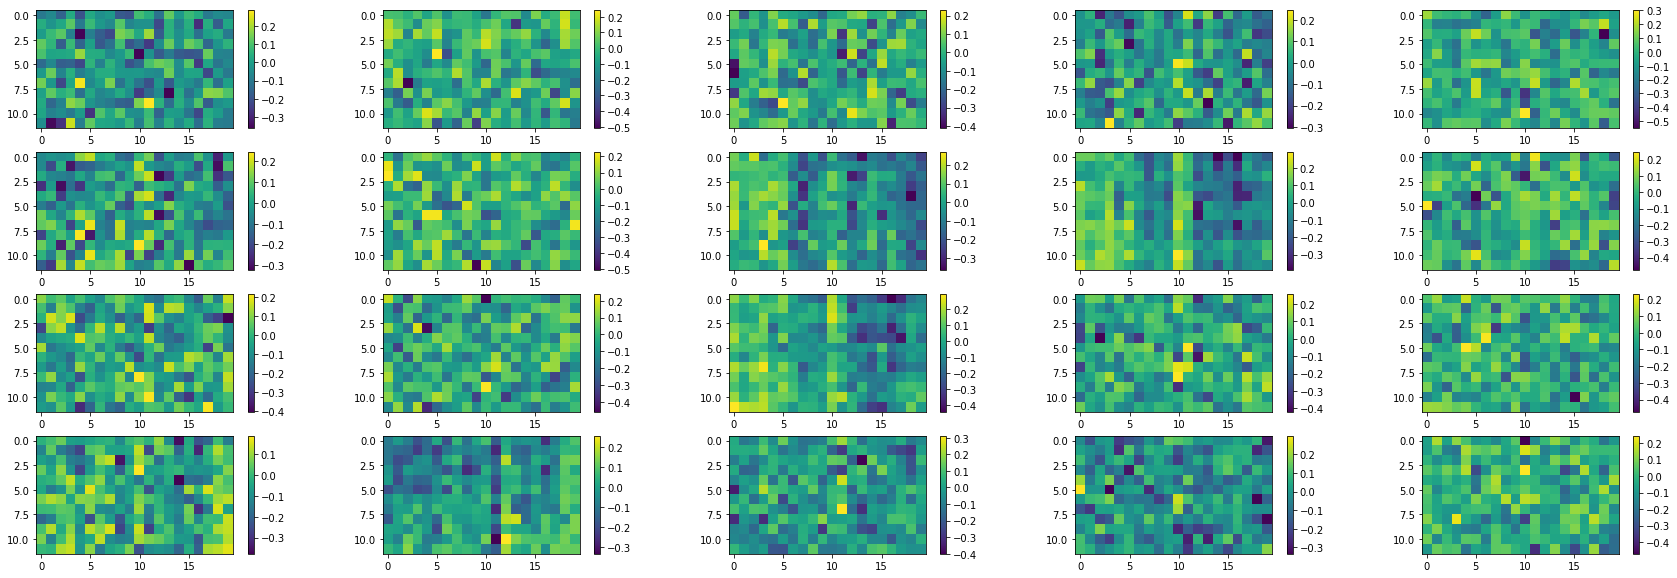

In [33]:
#I'm expecting 10 filters that are 8 x 20
#if I'm interpreting this correctly the weights[0] is and array [8x20 filter, 10 filters]

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,10))
for ind in range(1,21):
    w = weights[0][:,:,ind-1]
    plt.subplot(4,5,ind)
    plt.imshow(w)
    plt.colorbar()

since the data only has a single hot pixel in each row, I would expect to see similar patterns in the filters, but this doesn't look much like that so maybe there is some more work to be done here or my expecation is wrong.